In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df=pd.read_csv("Lastversion_Forest_dataset.csv")
df.head(2)

,Unnamed: 0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes
0,122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,1,0
1,123,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,1,0


In [11]:
print(df.columns)


Index(['Unnamed: 0', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Region', 'Classes'],
      dtype='object')


In [14]:
df.drop(columns=[col for col in ["day", "month", "year"] if col in df.columns], inplace=True)
df.head()

,Unnamed: 0,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes
0,122,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,1,0
1,123,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,1,0
2,124,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,1,0
3,125,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,1,0
4,126,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,1,0


In [ ]:
df[["Classes"]].value_counts()


Classes
1          78
0          43
Name: count, dtype: int64

In [19]:
df.columns

Index(['Unnamed: 0', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC',
       'ISI', 'BUI', 'FWI', 'Region', 'Classes'],
      dtype='object')

In [20]:
X=df.drop("FWI",axis=1)
y=df["FWI"]

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
X_train.shape,X_test.shape

((96, 12), (25, 12))

In [ ]:
X_train.corr()


,Unnamed: 0,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Region,Classes
Unnamed: 0,1.000000,-0.093508,-0.012521,-0.156912,-0.173095,0.152362,0.233588,0.376261,0.153276,0.274507,NaN,0.158296
Temperature,-0.093508,1.000000,-0.552250,-0.195463,-0.133734,0.595813,0.423831,0.350583,0.570669,0.410577,NaN,0.533052
RH,-0.012521,-0.552250,1.000000,0.065450,0.162716,-0.664334,-0.397228,-0.297790,-0.708345,-0.382159,NaN,-0.444018
Ws,-0.156912,-0.195463,0.065450,1.000000,-0.122810,0.057997,0.061610,0.045812,0.129770,0.061682,NaN,0.071267
Rain,-0.173095,-0.133734,0.162716,-0.122810,1.000000,-0.509788,-0.336032,-0.345108,-0.408057,-0.345952,NaN,-0.455641
FFMC,0.152362,0.595813,-0.664334,0.057997,-0.509788,1.000000,0.573345,0.498119,0.765886,0.572751,NaN,0.793373
DMC,0.233588,0.423831,-0.397228,0.061610,-0.336032,0.573345,1.000000,0.919985,0.659539,0.992353,NaN,0.526672
DC,0.376261,0.350583,-0.297790,0.045812,-0.345108,0.498119,0.919985,1.000000,0.523486,0.942047,NaN,0.485562
ISI,0.153276,0.570669,-0.708345,0.129770,-0.408057,0.765886,0.659539,0.523486,1.000000,0.647005,NaN,0.700990
BUI,0.274507,0.410577,-0.382159,0.061682,-0.345952,0.572751,0.992353,0.942047,0.647005,1.000000,NaN,0.546303


Text(0.5, 1.0, 'Correlation Heatmap of X_train')

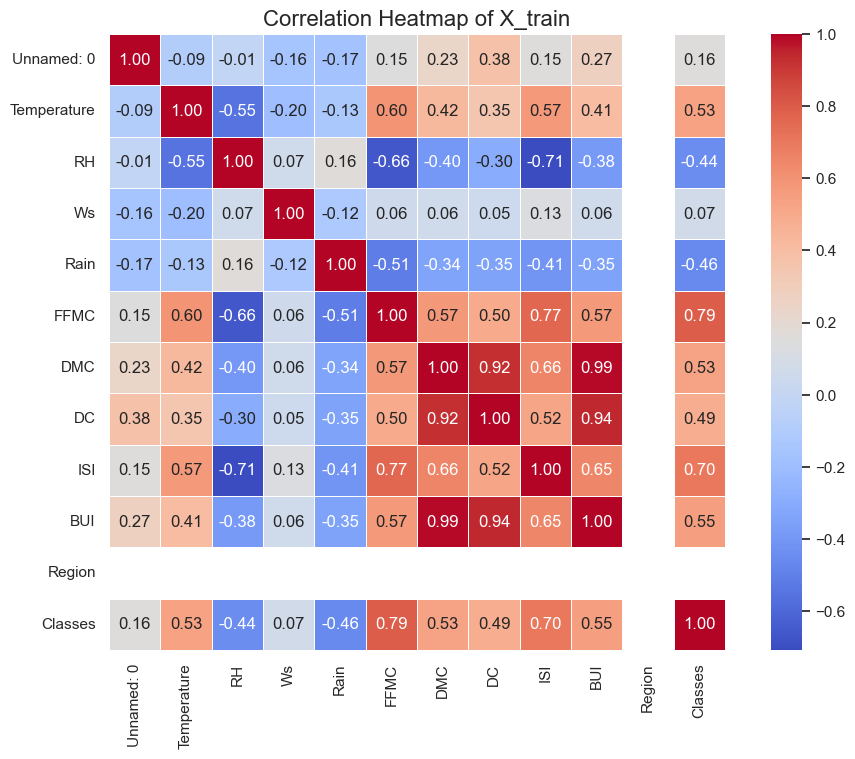

In [24]:
plt.figure(figsize=(12, 8))
sns.set(style="white")
sns.heatmap(X_train.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Correlation Heatmap of X_train", fontsize=16)

In [ ]:
import pandas as pd
import numpy as np

def core(dataset, threshold=0.8):
    corr_matrix = dataset.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    reduced_df = dataset.drop(columns=to_drop)
    print("Dropped columns:", to_drop)
    return reduced_df

core_feature= core(X_train,0.85)
core_feature

Dropped columns: ['DC', 'BUI']


,Unnamed: 0,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Region,Classes
12,134,30,52,15,2.0,72.3,11.4,1.4,1,0
15,137,29,87,15,0.4,47.4,4.2,0.2,1,0
115,237,28,70,15,0.0,79.9,13.8,2.4,1,0
76,198,42,24,9,0.0,96.0,30.3,15.7,1,1
98,220,30,88,14,0.0,82.5,6.6,3.0,1,1
...,...,...,...,...,...,...,...,...,...,...
106,228,33,26,13,0.0,93.9,21.2,14.2,1,1
14,136,28,90,15,0.0,66.8,7.2,1.2,1,0
92,214,28,67,19,0.0,75.4,2.9,2.0,1,0
51,173,31,71,17,0.0,87.3,46.6,6.9,1,1


In [ ]:
def core(dataset, threshold=0.8):
    corr_matrix = dataset.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    return to_drop

core_feature= core(X_train,0.85)
core_feature


['DC', 'BUI']

In [31]:
X_train.drop(core_feature, axis=1, inplace=True, errors='ignore')
X_test.drop(core_feature, axis=1, inplace=True, errors='ignore')

X_train.shape, X_test.shape

((96, 10), (25, 10))

In [ ]:
#==========================multycorrinarity================
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


In [ ]:
from sklearn.preprocessing import StandardScaler
# ======================Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[-1.41076386e+00, -8.51668064e-01, -2.51742157e-01,
         1.08750144e-01,  8.19290293e-01, -6.81604600e-01,
        -4.21950065e-01, -9.07545918e-01,  0.00000000e+00,
        -1.32017315e+00],
       [-1.32515492e+00, -1.12420184e+00,  2.03434878e+00,
         1.08750144e-01, -2.05489748e-01, -2.69284721e+00,
        -9.35240956e-01, -1.16652360e+00,  0.00000000e+00,
        -1.32017315e+00],
       [ 1.52847614e+00, -1.39673563e+00,  9.23961756e-01,
         1.08750144e-01, -4.61684758e-01, -6.77313546e-02,
        -2.50853101e-01, -6.91731184e-01,  0.00000000e+00,
        -1.32017315e+00],
       [ 4.15560023e-01,  2.41873730e+00, -2.08061491e+00,
        -2.39685317e+00, -4.61684758e-01,  1.23271065e+00,
         9.25438526e-01,  2.17860478e+00,  0.00000000e+00,
         7.57476397e-01],
       [ 1.04335886e+00, -8.51668064e-01,  2.09966567e+00,
        -3.08850408e-01, -4.61684758e-01,  1.42277914e-01,
        -7.64143992e-01, -5.62242344e-01,  0.00000000e+00,
         7.

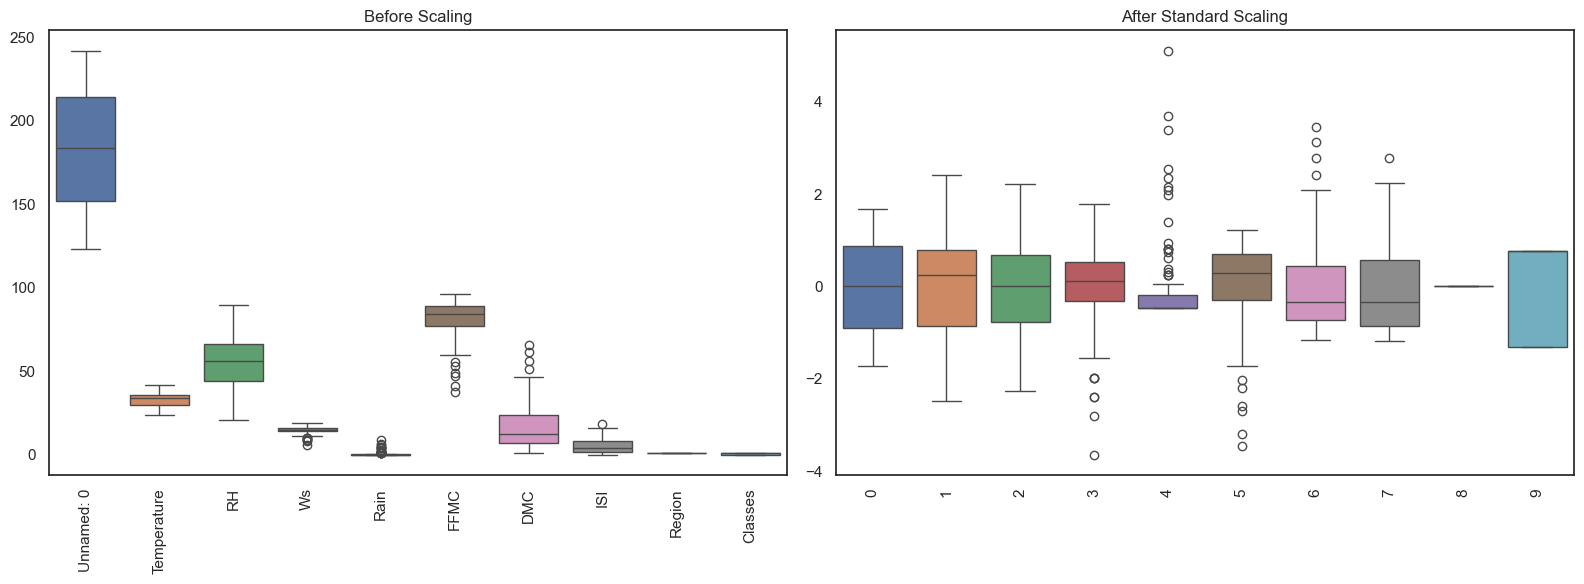

In [ ]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title("Before Scaling")
plt.xticks(rotation=90)

# =========================Scaled data
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title("After Standard Scaling")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

mean squsre erorr: 10.047741422935227
score: 0.7851051304618403


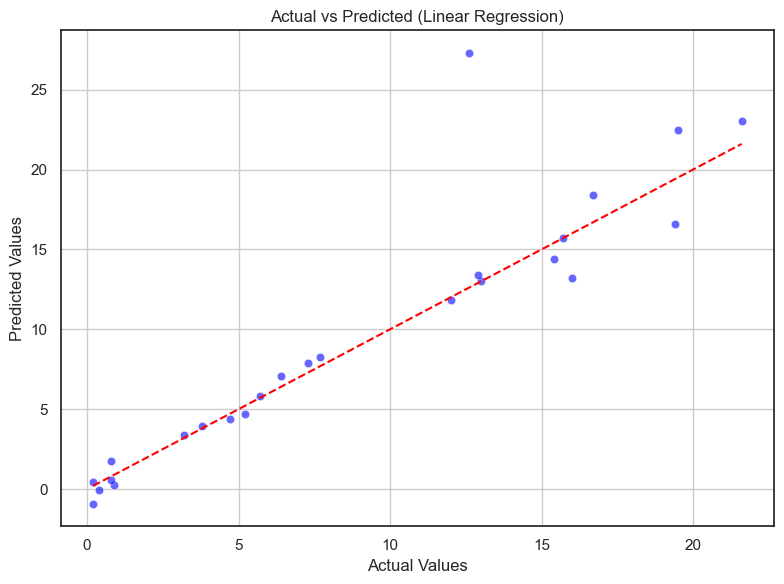

In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

#================== Linear Regression==========================
model = LinearRegression()  # Removed n_jobs=-1
model.fit(X_train_scaled, y_train)
y_predict= model.predict(X_test_scaled)
mae=mean_squared_error(y_test,y_predict)
score=r2_score(y_test,y_predict)
print("mean squsre erorr:",mae)
print("score:",score)

# === Plotting ================
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_predict, color="blue", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Linear Regression)")
plt.grid(True)
plt.tight_layout()
plt.show()



Lasso Regression - Mean Squared Error: 6.973128519012538
Lasso Regression - R² Score: 0.8508630466996762


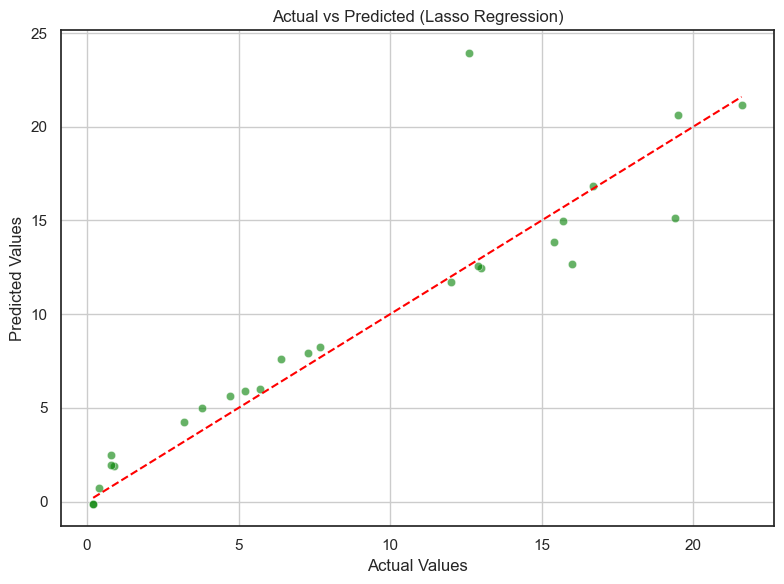

In [ ]:
from sklearn.linear_model import Lasso
# ==========================Initialize and train the Lasso model=================
lasso_model = Lasso(alpha=1.0)  #alpha
lasso_model.fit(X_train_scaled, y_train)

# =====================Predict=============
y_pred_lasso = lasso_model.predict(X_test_scaled)

# ===============Evaluate===================
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print("Lasso Regression - Mean Squared Error:", mse_lasso)
print("Lasso Regression - R² Score:", r2_lasso)

# ===================Plot Actual vs Predicted====================
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_lasso, alpha=0.6, color="green")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Lasso Regression)")
plt.grid(True)
plt.tight_layout()
plt.show()

Best alpha from cross-validation: 0.010464231860898815
LassoCV - Mean Squared Error: 9.907520328529412
LassoCV - R² Score: 0.7881040923698421


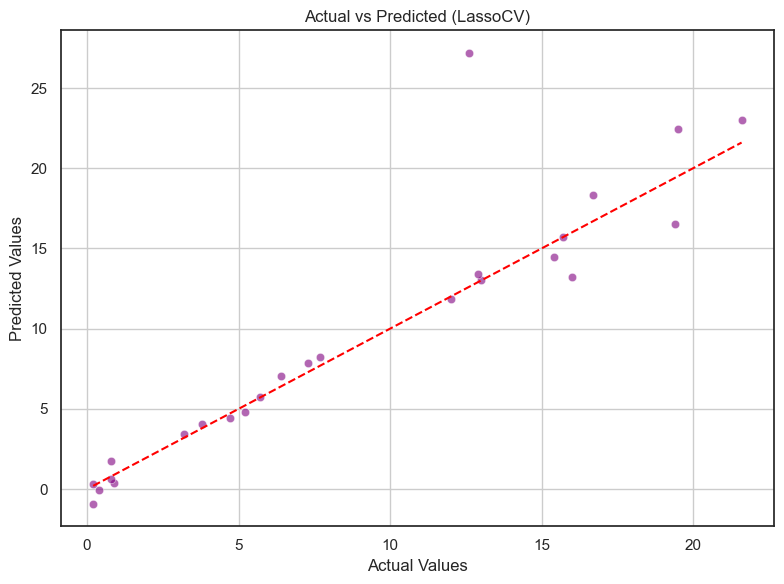

In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# =============Create and fit LassoCV model=================
lasso_cv = LassoCV(cv=5, random_state=42)  # 5-fold cross-validation
lasso_cv.fit(X_train_scaled, y_train)

# ===============Best alpha selected================
print("Best alpha from cross-validation:", lasso_cv.alpha_)

# ===================Predict on test set=================
y_pred_cv = lasso_cv.predict(X_test_scaled)

# ============== Evaluation================================
mse_cv = mean_squared_error(y_test, y_pred_cv)
r2_cv = r2_score(y_test, y_pred_cv)
print("LassoCV - Mean Squared Error:", mse_cv)
print("LassoCV - R² Score:", r2_cv)

# ===========Plot Actual vs Predicted=================
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_cv, alpha=0.6, color="purple")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (LassoCV)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [42]:
print(lasso_cv.alphas_)

[7.91580765e+00 7.38230871e+00 6.88476581e+00 6.42075564e+00
 5.98801820e+00 5.58444581e+00 5.20807286e+00 4.85706618e+00
 4.52971617e+00 4.22442846e+00 3.93971612e+00 3.67419244e+00
 3.42656417e+00 3.19562521e+00 2.98025077e+00 2.77939184e+00
 2.59207013e+00 2.41737328e+00 2.25445041e+00 2.10250800e+00
 1.96080600e+00 1.82865424e+00 1.70540906e+00 1.59047020e+00
 1.48327783e+00 1.38330987e+00 1.29007941e+00 1.20313238e+00
 1.12204528e+00 1.04642319e+00 9.75897766e-01 9.10125522e-01
 8.48786108e-01 7.91580765e-01 7.38230871e-01 6.88476581e-01
 6.42075564e-01 5.98801820e-01 5.58444581e-01 5.20807286e-01
 4.85706618e-01 4.52971617e-01 4.22442846e-01 3.93971612e-01
 3.67419244e-01 3.42656417e-01 3.19562521e-01 2.98025077e-01
 2.77939184e-01 2.59207013e-01 2.41737328e-01 2.25445041e-01
 2.10250800e-01 1.96080600e-01 1.82865424e-01 1.70540906e-01
 1.59047020e-01 1.48327783e-01 1.38330987e-01 1.29007941e-01
 1.20313238e-01 1.12204528e-01 1.04642319e-01 9.75897766e-02
 9.10125522e-02 8.487861

Best alpha from cross-validation: 0.1
RidgeCV - Mean Squared Error: 9.978530197591336
RidgeCV - R² Score: 0.7865853772770003


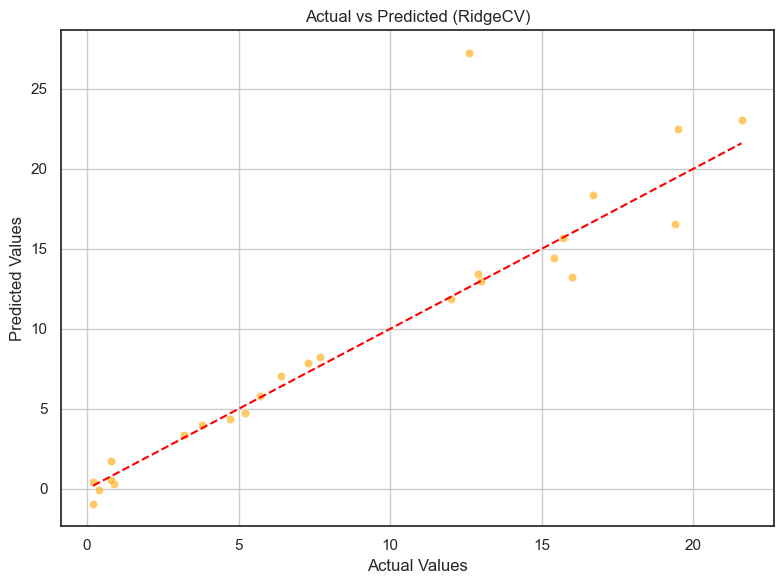

In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# =========Create and fit RidgeCV model==============
ridge_cv = RidgeCV(cv=5)  # 5-fold cross-validation
ridge_cv.fit(X_train_scaled, y_train)

# 2. Best alpha selected
print("Best alpha from cross-validation:", ridge_cv.alpha_)

# =================== Predict on test set====================
y_pred_ridge_cv = ridge_cv.predict(X_test_scaled)

# ==============Evaluation=====================
mse_ridge_cv = mean_squared_error(y_test, y_pred_ridge_cv)
r2_ridge_cv = r2_score(y_test, y_pred_ridge_cv)
print("RidgeCV - Mean Squared Error:", mse_ridge_cv)
print("RidgeCV - R² Score:", r2_ridge_cv)

# =====================Plot Actual vs Predicted================
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_ridge_cv, alpha=0.6, color="orange")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (RidgeCV)")
plt.grid(True)
plt.tight_layout()
plt.show()


ElasticNet - Mean Squared Error: 6.122314714288547
ElasticNet - R² Score: 0.8690597253233997


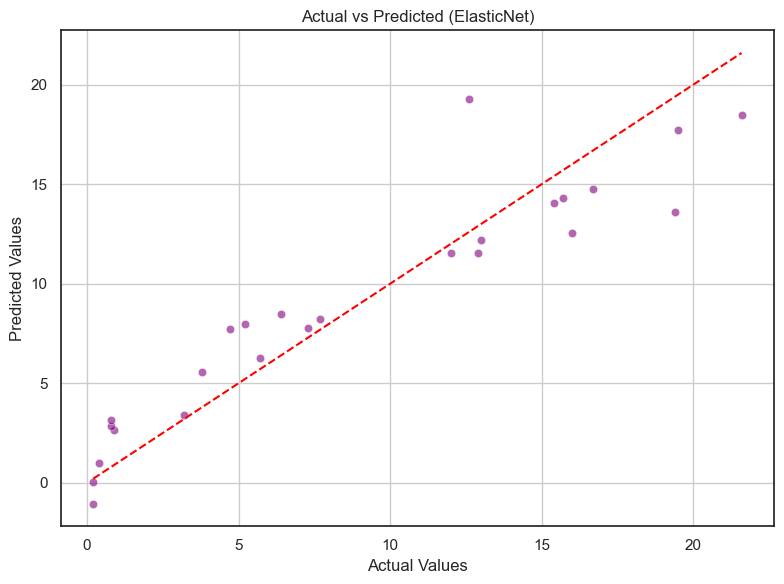

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# ===============Create and fit ElasticNet model=============
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)  # alpha: regularization strength, l1_ratio: mix of Lasso and Ridge
elastic_net.fit(X_train_scaled, y_train)

# ==================Predict on test set==================
y_pred_elastic_net = elastic_net.predict(X_test_scaled)

# =============Evaluation==============================
mse_elastic_net = mean_squared_error(y_test, y_pred_elastic_net)
r2_elastic_net = r2_score(y_test, y_pred_elastic_net)
print("ElasticNet - Mean Squared Error:", mse_elastic_net)
print("ElasticNet - R² Score:", r2_elastic_net)

# =======================Plot===============
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_elastic_net, alpha=0.6, color="purple")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (ElasticNet)")
plt.grid(True)
plt.tight_layout()
plt.show()


Best alpha from cross-validation: 0.015831615307597368
Best l1_ratio from cross-validation: 0.5
ElasticNetCV - Mean Squared Error: 9.453742521923857
ElasticNetCV - R² Score: 0.7978092110074719


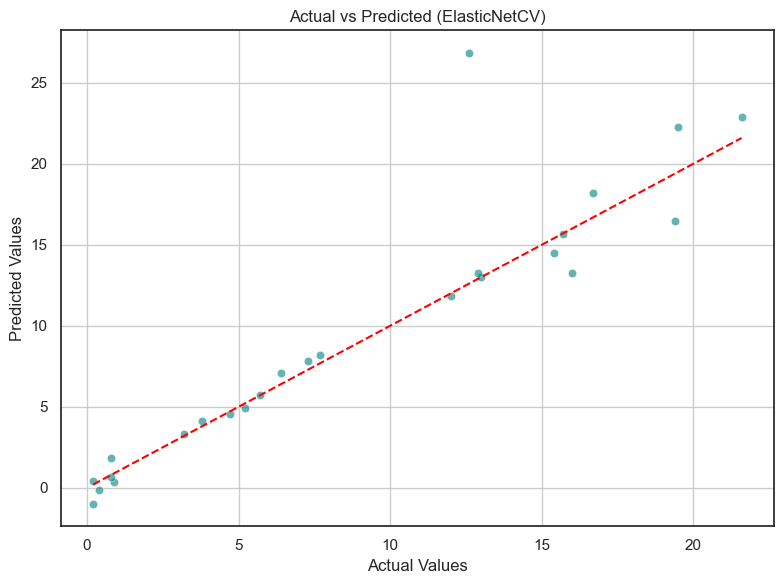

In [ ]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# ============Create and fit ElasticNetCV model==============
elastic_net_cv = ElasticNetCV(cv=5, random_state=42)  # 5-fold cross-validation
elastic_net_cv.fit(X_train_scaled, y_train)

# ================= Best alpha and l1_ratio selected==========
print("Best alpha from cross-validation:", elastic_net_cv.alpha_)
print("Best l1_ratio from cross-validation:", elastic_net_cv.l1_ratio_)

# =============Predict on test set============================
y_pred_elastic_net_cv = elastic_net_cv.predict(X_test_scaled)

# ===========Evaluation===================================
mse_elastic_net_cv = mean_squared_error(y_test, y_pred_elastic_net_cv)
r2_elastic_net_cv = r2_score(y_test, y_pred_elastic_net_cv)
print("ElasticNetCV - Mean Squared Error:", mse_elastic_net_cv)
print("ElasticNetCV - R² Score:", r2_elastic_net_cv)


plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_elastic_net_cv, alpha=0.6, color="teal")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (ElasticNetCV)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [46]:
scaler

StandardScaler()

In [ ]:
import pickle
#===================== Save each model and the scaler using pickle=============
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('lasso_model.pkl', 'wb') as f:
    pickle.dump(lasso_model, f)

with open('lasso_cv.pkl', 'wb') as f:
    pickle.dump(lasso_cv, f)

with open('ridge_cv.pkl', 'wb') as f:
    pickle.dump(ridge_cv, f)



with open('elastic_net.pkl', 'wb') as f:
    pickle.dump(elastic_net, f)

with open('elastic_net_cv.pkl', 'wb') as f:
    pickle.dump(elastic_net_cv, f)
